In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Podcast_data.csv")
dataset

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [3]:
from Univariate import Univariate
quan,qual=Univariate.quanQual(dataset)

In [4]:
descriptive=Univariate.descriptive(dataset,quan)
descriptive

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
Max,749999,325.24,119.46,119.91,103.91,119.97
Min,0,0,1.3,0,0,0
Mean,375000,64.5047,59.8599,52.2364,1.34885,45.4374
Median,375000,63.84,60.05,53.58,1,43.3795
Mode,0,6.6,38.68,68.53,0,0
Q1:25%,187500,35.73,39.41,28.38,0,23.1783
Q2:50%,375000,63.84,60.05,53.58,1,43.3795
Q3:75%,562499,94.07,79.53,76.6,2,64.8116
Q4:100%,749999,325.24,119.46,119.91,103.91,119.97
IQR,375000,58.34,40.12,48.22,2,41.6332


## Q1. What is the distribution of the target variable (Listening_Time_minutes)?

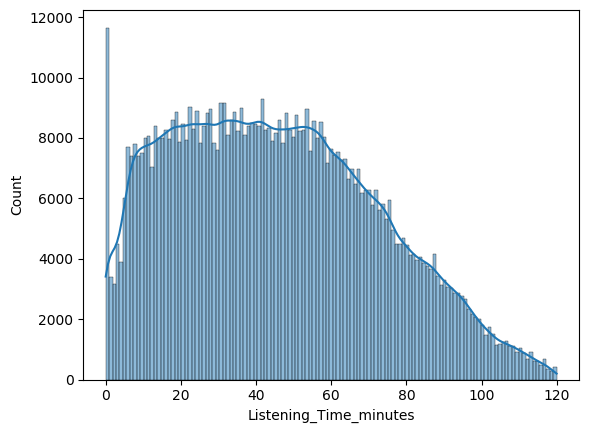

In [5]:
import seaborn as sns
sns.histplot(dataset['Listening_Time_minutes'], kde=True)

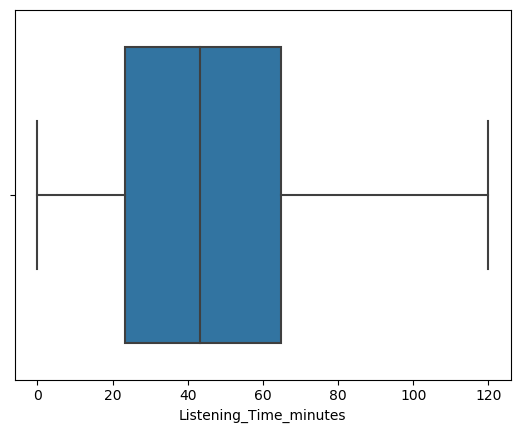

In [7]:
sns.boxplot(x=dataset['Listening_Time_minutes'])

## Q2. Are there outliers or skewness in numerical features?

In [8]:
dataset[quan].skew()

id                            -7.874573e-17
Episode_Length_minutes        -2.005613e-03
Host_Popularity_percentage     4.926275e-03
Guest_Popularity_percentage   -1.070354e-01
Number_of_Ads                  6.032992e+00
Listening_Time_minutes         3.508123e-01
dtype: float64

In [9]:
lesser,greater=Univariate.findOutlier(descriptive,quan)

In [10]:
lesser

[]

In [11]:
greater

['Episode_Length_minutes', 'Number_of_Ads']

## Q3. Which features are most correlated with Listening_Time_minutes?

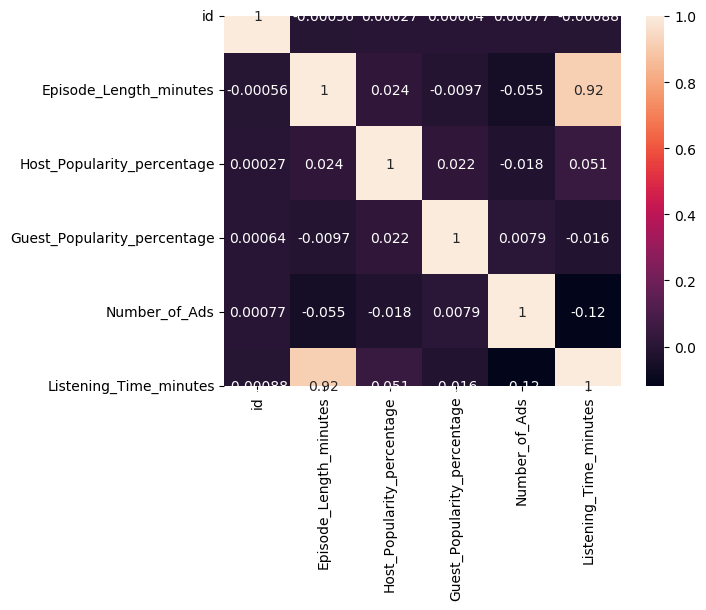

In [12]:
dataset.corr()
sns.heatmap(dataset.corr(), annot=True)

## Q4. How does Episode_Length_minutes affect listening time?

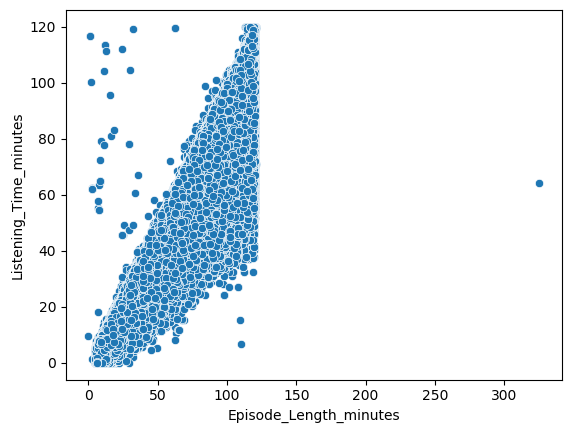

In [13]:
sns.scatterplot(x='Episode_Length_minutes', y='Listening_Time_minutes', data=dataset)

## Q5. Do more ads decrease listening time?

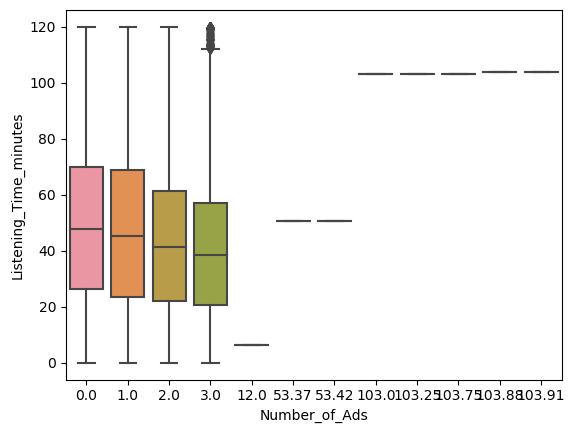

In [39]:
sns.boxplot(x='Number_of_Ads', y='Listening_Time_minutes', data=dataset)

## Q6. Which genres get the most listening time?

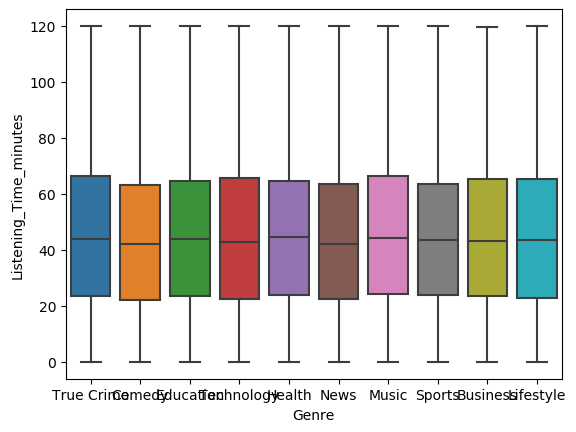

In [16]:
sns.boxplot(x='Genre', y='Listening_Time_minutes', data=dataset)

## Q7. Does publication day/time impact listening time?

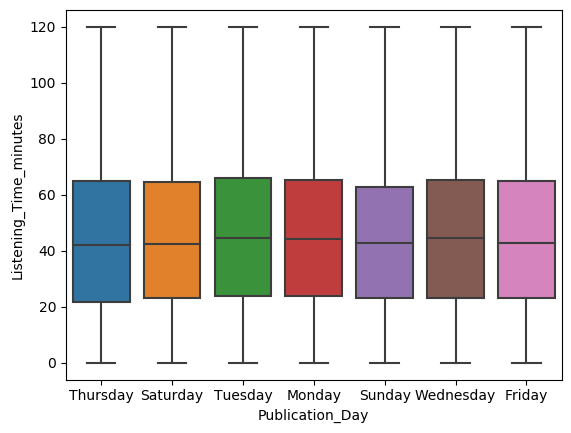

In [24]:
sns.boxplot(x='Publication_Day', y='Listening_Time_minutes', data=dataset)



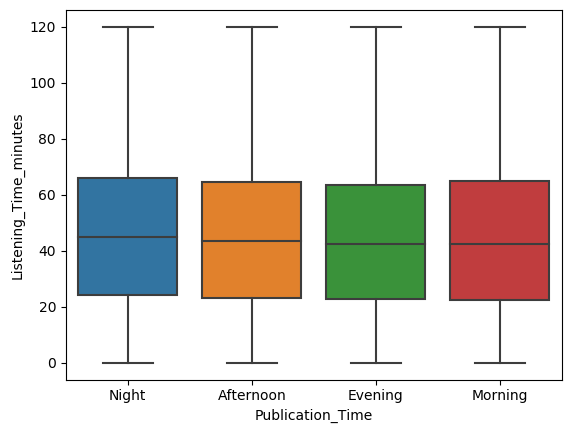

In [19]:
sns.boxplot(x='Publication_Time', y='Listening_Time_minutes', data=dataset)

## Q8. Does sentiment of the episode relate to listening time?

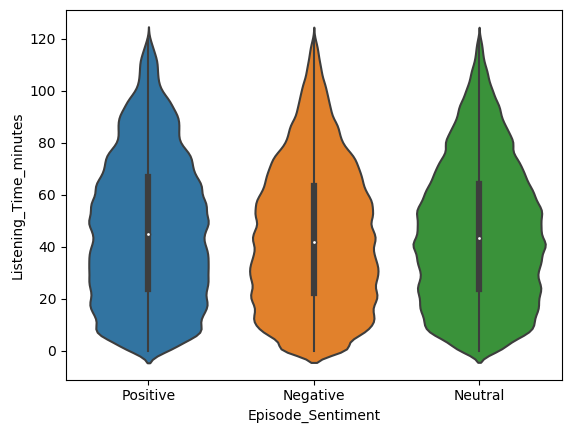

In [26]:
sns.violinplot(x='Episode_Sentiment', y='Listening_Time_minutes', data=dataset)

## Q9. Does the genre of a podcast affect listening time?

In [29]:
import scipy.stats as stats
stats.f_oneway(*[dataset[dataset['Genre'] == g]['Listening_Time_minutes'] for g in dataset['Genre'].unique()])


F_onewayResult(statistic=45.482308179537995, pvalue=1.4679472063789464e-82)

p > 0.05 . Difference is not significant. Genre does not affect the listening time.

## Q10. Does the day of the week on which a podcast episode is published (e.g., Monday through Sunday) influence how long users typically listen to it?


In [31]:
stats.f_oneway(*[dataset[dataset['Publication_Day'] == d]['Listening_Time_minutes'] for d in dataset['Publication_Day'].unique()])


F_onewayResult(statistic=40.51005929189126, pvalue=1.2702000475390229e-49)

p > 0.05 . Difference is not significant. Day of the week does not affect the listening time.

## Q11. Does the time of day the podcast is published (e.g., Morning, Afternoon, Evening, Night) have a significant effect on how long listeners engage with the episode?


In [32]:
stats.f_oneway(*[dataset[dataset['Publication_Time'] == t]['Listening_Time_minutes'] for t in dataset['Publication_Time'].unique()])


F_onewayResult(statistic=151.76735956228364, pvalue=2.479230139152791e-98)

p > 0.05 . Difference is not significant. Time of the day does not affect the listening time.

## Q12. Does the emotional tone or sentiment of a podcast episode (e.g., Positive, Neutral, Negative) significantly influence how long users listen to it?

In [34]:
stats.f_oneway(*[dataset[dataset['Episode_Sentiment'] == s]['Listening_Time_minutes'] for s in dataset['Episode_Sentiment'].unique()])


F_onewayResult(statistic=586.007118608532, pvalue=5.000200148983822e-255)

p > 0.05 . Difference is not significant. Sentiment does not affect the listening time.

## Q13. Is there a significant difference in listening time between podcasts published on weekdays and those on weekends?

In [35]:
dataset['Is_Weekend'] = dataset['Publication_Day'].isin(['Saturday', 'Sunday'])


In [36]:
stats.ttest_ind(dataset[dataset['Is_Weekend'] == True]['Listening_Time_minutes'],
                dataset[dataset['Is_Weekend'] == False]['Listening_Time_minutes'],
                nan_policy='omit')


Ttest_indResult(statistic=-7.794328731018073, pvalue=6.483408605882425e-15)

In [ ]:
p > 0.05 . Difference is not significant. 